# Titanic Dataset

### Testing different classificators

- Logistic Regression
- Decision Tree
- KNN
- SVM

See DataProcessing.ipynb for data pre-processing stage

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
from sklearn.model_selection import validation_curve, learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from my_lib.plotting import plot_probability_distributions, plot_learning_curve, plot_validation_curve

In [4]:
# Reading data - preprocessed in DataProcessing
data = pd.read_csv('data/titanic_newAge_withEncoded.csv')

In [5]:
# Selecting features and target
X = data.drop(columns=['Unnamed: 0', 'PassengerId', 'Survived'])
y = data['Survived']

In [7]:
# Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [8]:
# Rescaling data
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt_clf = DecisionTreeClassifier(max_depth=4, class_weight='balanced' ,random_state=1)

In [11]:
dt_clf.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=1)

In [12]:
score = dt_clf.score(X_test_std, y_test)
print('Score: {}'.format(score))

Score: 0.7884615384615384


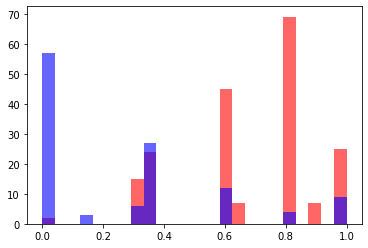

In [13]:
# Plotting probability distributions
plot_probability_distributions(dt_clf, X_test_std, y_test)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'SibSp'),
  Text(1, 0, 'Parch'),
  Text(2, 0, 'Fare'),
  Text(3, 0, 'HasCabin'),
  Text(4, 0, 'HasAge'),
  Text(5, 0, 'NewAge'),
  Text(6, 0, 'IsMale'),
  Text(7, 0, 'EmbarkedQ'),
  Text(8, 0, 'EmbarkedS'),
  Text(9, 0, 'IsFirstClass'),
  Text(10, 0, 'IsSecondClass'),
  Text(11, 0, 'IsTicketNumber')])

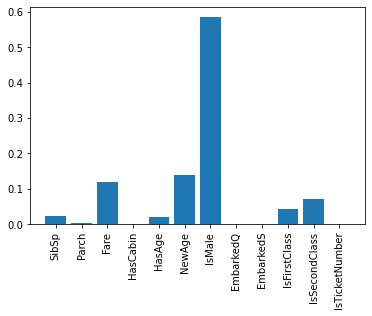

In [14]:
# Looking at the feature importances
dt_clf.feature_importances_
plt.bar(range(len(dt_clf.feature_importances_)), dt_clf.feature_importances_)

plt.xticks(range(len(dt_clf.feature_importances_)), list(X.columns))
plt.xticks(rotation=90)

### Learning  curve

In [15]:
train_sizes, train_scores, test_scores = learning_curve(
    dt_clf,
    X_train_std,
    y_train,
    train_sizes=np.linspace(0.1, 1, 10),
    cv=5
)

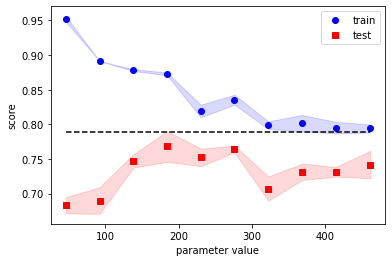

In [16]:
plot_learning_curve(train_scores, test_scores, train_sizes, expected_score=score)

### Validation curve - max depth

In [17]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [18]:
param_range = range(1, 20)
train_scores, test_scores = validation_curve(
    estimator=dt_clf, 
    X=X_train_std, 
    y=y_train, 
    param_name='max_depth', 
    param_range=param_range,
    cv=5
)

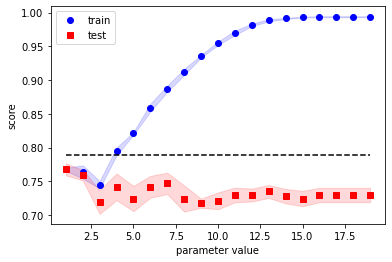

In [19]:
plot_learning_curve(train_scores, test_scores, param_range, expected_score=score)

## SVM Classifier

In [20]:
from sklearn.svm import SVC